In [30]:
#Enlist all libraries in the environment
#!pip list


#!pip install numpy
#!pip install torch
#!pip install pandas
#!pip install matplotlib seaborn
#!pip install Pyarrow
#!pip install tensorflow
#!pip install scikit-learn
#!pip install torchvision
#!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [16]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [29]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

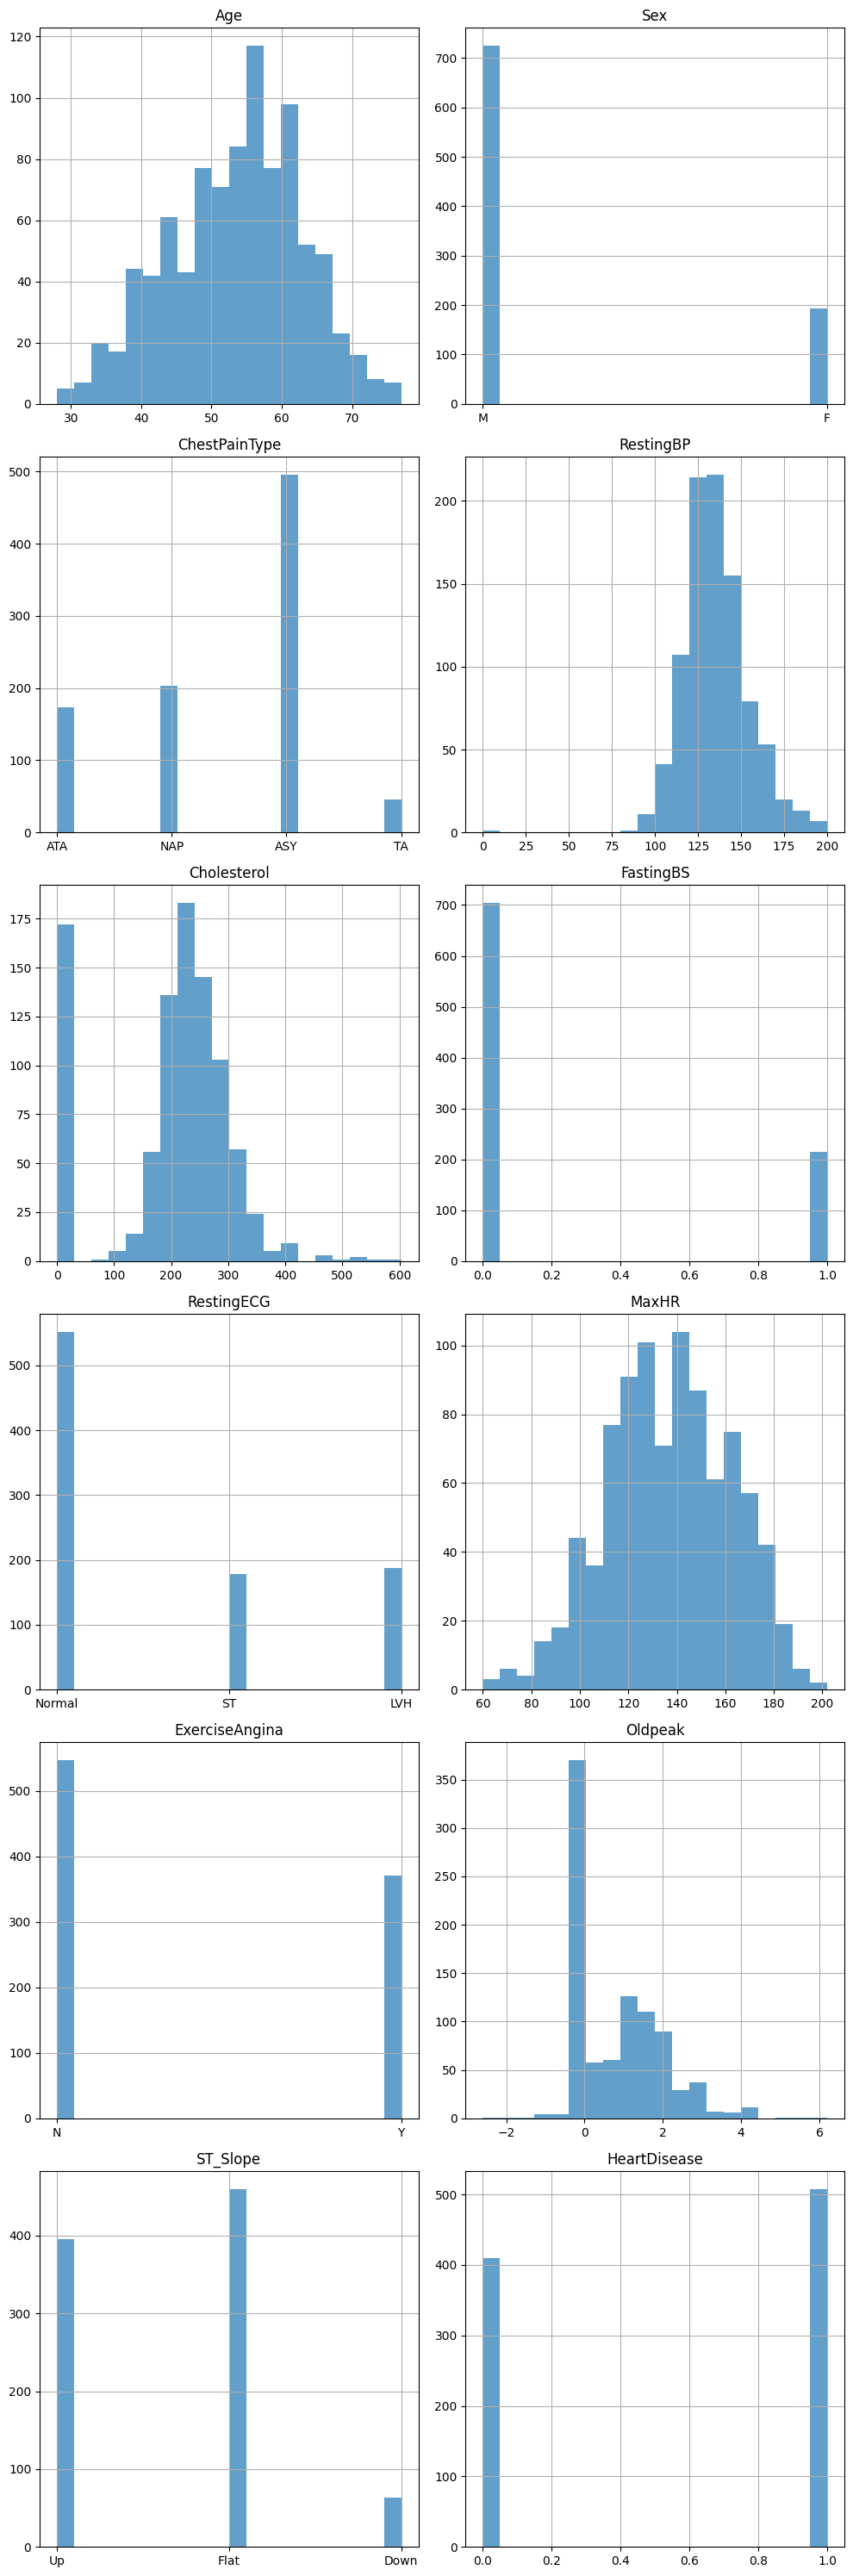

In [18]:
#Create histograms for each column of the data

import pandas as pd
import matplotlib.pyplot as plt


# Number of rows and columns for the subplot
n_rows = len(df.columns) // 2 + len(df.columns) % 2
n_cols = 2

# Create a figure and a set of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Flatten the array of axes for easy iterating
axs = axs.flatten()

# Loop through all columns and plot histograms
for i, col in enumerate(df.columns):
    df[col].hist(ax=axs[i], bins=20, alpha=0.7)
    axs[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the layout
plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Apply label encoding to all categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode each categorical column and store the LabelEncoder objects
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [20]:
decoded_col = label_encoders['Sex'].inverse_transform(df['Sex'])
#print(decoded_col)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.preprocessing import LabelEncoder


# Define features (X) and target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.842391304347826
Confusion Matrix:
 [[68  9]
 [20 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
dtree.fit(X_train, y_train)

# Predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluation
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
class_report_dtree = classification_report(y_test, y_pred_dtree)

# Print the results
print("Decision Tree Accuracy:", accuracy_dtree)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dtree)
print("Decision Tree Classification Report:\n", class_report_dtree)


Decision Tree Accuracy: 0.8641304347826086
Decision Tree Confusion Matrix:
 [[68  9]
 [16 91]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=200)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.8804347826086957
Random Forest Confusion Matrix:
 [[68  9]
 [13 94]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



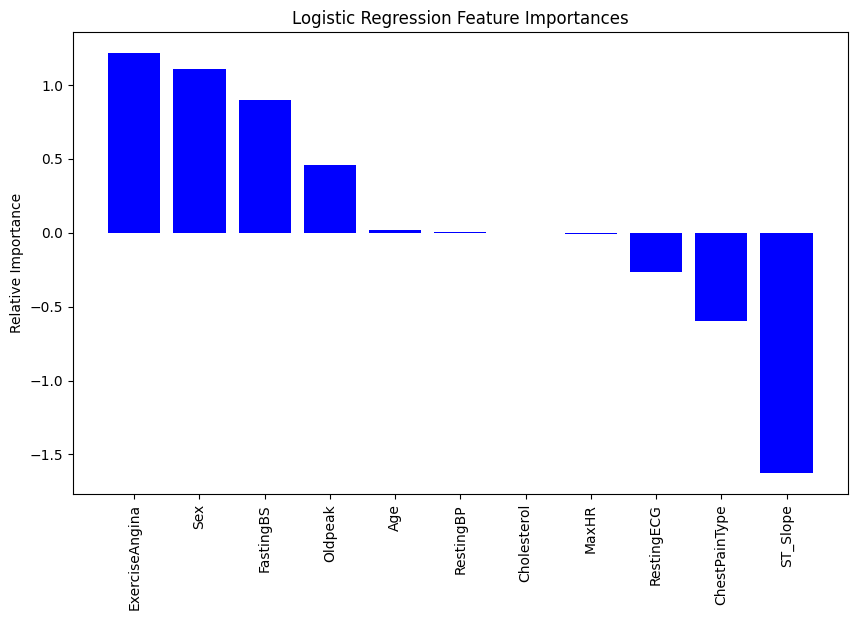

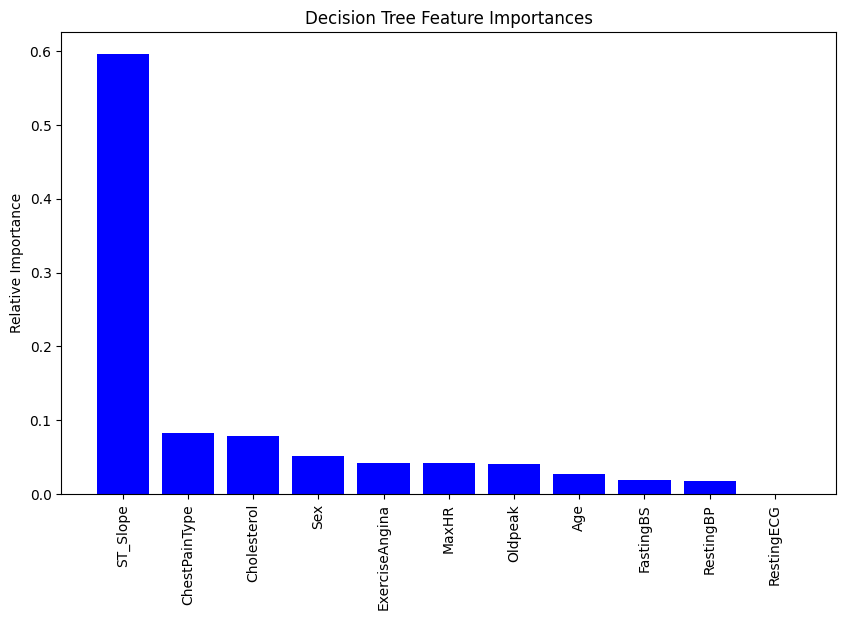

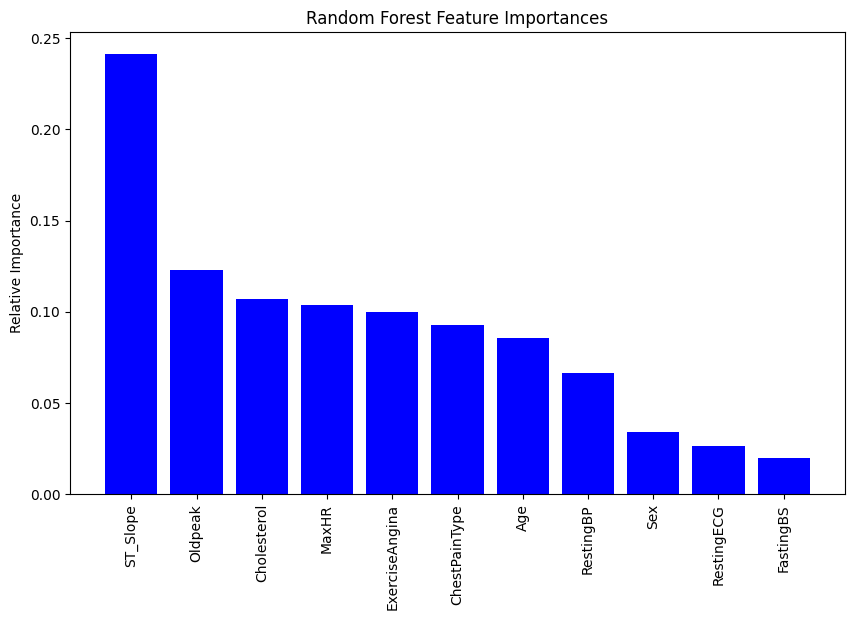

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)
rf = RandomForestClassifier(random_state=42)

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get feature importances or coefficients
logreg_importance = logreg.coef_[0]
dtree_importance = dtree.feature_importances_
rf_importance = rf.feature_importances_

# Function to plot feature importances
def plot_feature_importance(importances, title, feature_names):
    # Sort importances
    indices = np.argsort(importances)[::-1]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(indices)), importances[indices], color='b', align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.ylabel('Relative Importance')
    plt.show()

# Plotting
plot_feature_importance(logreg_importance, 'Logistic Regression Feature Importances', X.columns)
plot_feature_importance(dtree_importance, 'Decision Tree Feature Importances', X.columns)
plot_feature_importance(rf_importance, 'Random Forest Feature Importances', X.columns)

